In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
data = pd.read_csv('Data/Datasets/Corona_Updated.csv')

## EDA

In [3]:
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Temprature,Humidity,Temp_Cat,Humid_Cat
0,Hubei,Mainland China,2020-03-10T15:13:05,67760,3024,47743,30.9756,112.2707,12.5,86,1,1
1,NaN,Italy,2020-03-10T17:53:02,10149,631,724,43.0000,12.0000,12.9,64,1,1
2,NaN,Iran (Islamic Republic of),2020-03-10T19:13:20,8042,291,2731,32.0000,53.0000,11.9,9,0,0
3,NaN,Republic of Korea,2020-03-10T19:13:20,7513,54,247,36.0000,128.0000,4.9,41,0,0
4,NaN,France,2020-03-10T18:53:02,1784,33,12,47.0000,2.0000,11.9,93,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  99 non-null     object 
 1   Country/Region  206 non-null    object 
 2   Last Update     206 non-null    object 
 3   Confirmed       206 non-null    int64  
 4   Deaths          206 non-null    int64  
 5   Recovered       206 non-null    int64  
 6   Latitude        206 non-null    float64
 7   Longitude       206 non-null    float64
 8   Temprature      206 non-null    float64
 9   Humidity        206 non-null    int64  
 10  Temp_Cat        206 non-null    int64  
 11  Humid_Cat       206 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 19.4+ KB


In [5]:
data.nunique()

Province/State     99
Country/Region    115
Last Update       101
Confirmed          93
Deaths             18
Recovered          52
Latitude          201
Longitude         204
Temprature        161
Humidity           69
Temp_Cat            2
Humid_Cat           2
dtype: int64

In [6]:
data[data['Country/Region'].duplicated()]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Temprature,Humidity,Temp_Cat,Humid_Cat
7,Guangdong,Mainland China,2020-03-10T09:13:07,1353,8,1274,23.3417,113.4244,20.9,79,1,1
8,Henan,Mainland China,2020-03-08T05:03:02,1272,22,1247,33.8820,113.6140,14.7,59,1,1
9,Zhejiang,Mainland China,2020-03-10T10:33:02,1215,1,1191,29.1832,120.0934,11.0,89,0,0
10,Hunan,Mainland China,2020-03-10T08:33:02,1018,4,990,27.6104,111.7088,12.0,97,0,0
11,Anhui,Mainland China,2020-03-08T05:13:06,990,6,984,31.8257,117.2264,13.2,70,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
201,New Mexico,US,2020-03-10T02:33:04,0,0,0,34.8405,-106.2485,10.0,75,0,0
202,North Dakota,US,2020-03-10T02:33:04,0,0,0,47.5289,-99.7840,2.7,89,0,0
203,South Dakota,US,2020-03-10T02:33:04,0,0,0,44.2998,-99.4388,5.9,69,0,0
204,West Virginia,US,2020-03-10T02:33:04,0,0,0,38.4912,-80.9545,10.6,96,0,0


In [8]:
data[data['Country/Region'].duplicated()]['Country/Region'].unique()

array(['Mainland China', 'US', 'Canada', 'Australia'], dtype=object)

In [12]:
data[data['Country/Region'].duplicated()]['Country/Region'].value_counts()

US                51
Mainland China    30
Australia          7
Canada             3
Name: Country/Region, dtype: int64

In [16]:
data['location'] = data['Country/Region'] + '-' + data['Province/State'].fillna('')
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Temprature,Humidity,Temp_Cat,Humid_Cat,location
0,Hubei,Mainland China,2020-03-10T15:13:05,67760,3024,47743,30.9756,112.2707,12.5,86,1,1,Mainland China-Hubei
1,NaN,Italy,2020-03-10T17:53:02,10149,631,724,43.0000,12.0000,12.9,64,1,1,Italy-
2,NaN,Iran (Islamic Republic of),2020-03-10T19:13:20,8042,291,2731,32.0000,53.0000,11.9,9,0,0,Iran (Islamic Republic of)-
3,NaN,Republic of Korea,2020-03-10T19:13:20,7513,54,247,36.0000,128.0000,4.9,41,0,0,Republic of Korea-
4,NaN,France,2020-03-10T18:53:02,1784,33,12,47.0000,2.0000,11.9,93,0,0,France-


In [18]:
data.drop(columns=['Province/State', 'Country/Region'], inplace=True)

In [19]:
data.head()

,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Temprature,Humidity,Temp_Cat,Humid_Cat,location
0,2020-03-10T15:13:05,67760,3024,47743,30.9756,112.2707,12.5,86,1,1,Mainland China-Hubei
1,2020-03-10T17:53:02,10149,631,724,43.0000,12.0000,12.9,64,1,1,Italy-
2,2020-03-10T19:13:20,8042,291,2731,32.0000,53.0000,11.9,9,0,0,Iran (Islamic Republic of)-
3,2020-03-10T19:13:20,7513,54,247,36.0000,128.0000,4.9,41,0,0,Republic of Korea-
4,2020-03-10T18:53:02,1784,33,12,47.0000,2.0000,11.9,93,0,0,France-


In [20]:
sns.set_style('darkgrid')

<AxesSubplot:>

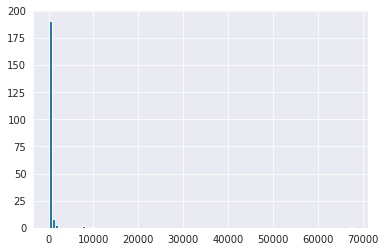

In [21]:
data.Confirmed.hist(bins=100)

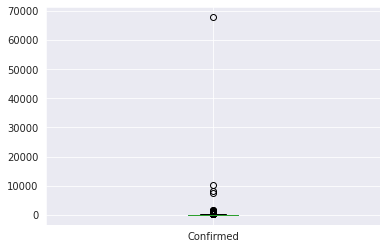

In [22]:
data.Confirmed.plot.box();

In [23]:
data.Confirmed.describe()

count      206.000000
mean       575.640777
std       4822.697784
min          0.000000
25%          3.000000
50%         12.000000
75%         75.750000
max      67760.000000
Name: Confirmed, dtype: float64

<AxesSubplot:>

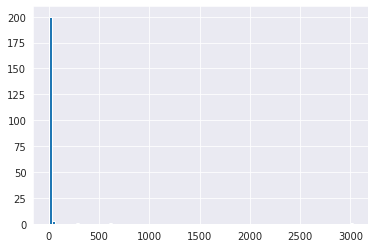

In [24]:
data.Deaths.hist(bins=100)

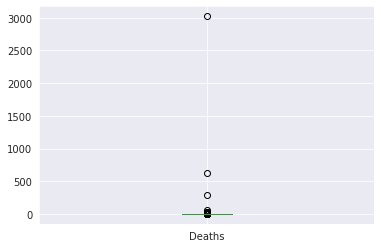

In [25]:
data.Deaths.plot.box();

In [26]:
data.Deaths.describe()

count     206.000000
mean       20.689320
std       215.794845
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      3024.000000
Name: Deaths, dtype: float64

## Normality Test

### Confirmed

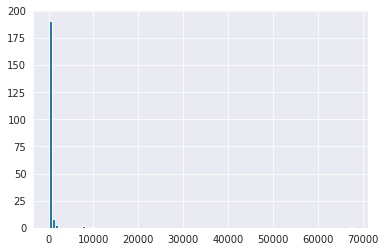

In [27]:
data.Confirmed.hist(bins=100);

((array([-2.71049554, -2.40199212, -2.22624724, -2.10045095, -2.00110795,
         -1.9183052 , -1.84688445, -1.7838044 , -1.72711495, -1.67548768,
         -1.62797516, -1.58387697, -1.54266003, -1.5039088 , -1.46729282,
         -1.43254474, -1.39944511, -1.36781141, -1.3374902 , -1.30835111,
         -1.28028247, -1.25318777, -1.2269831 , -1.20159492, -1.17695849,
         -1.15301643, -1.12971767, -1.10701655, -1.08487203, -1.06324711,
         -1.0421083 , -1.02142519, -1.00117005, -0.98131755, -0.96184447,
         -0.94272946, -0.92395285, -0.90549646, -0.88734349, -0.86947831,
         -0.85188643, -0.83455431, -0.81746934, -0.80061972, -0.7839944 ,
         -0.76758301, -0.75137579, -0.73536359, -0.71953774, -0.70389009,
         -0.68841292, -0.67309893, -0.65794119, -0.64293314, -0.62806852,
         -0.61334141, -0.59874614, -0.58427732, -0.56992979, -0.55569865,
         -0.54157916, -0.52756684, -0.51365734, -0.49984653, -0.4861304 ,
         -0.47250513, -0.45896703, -0.

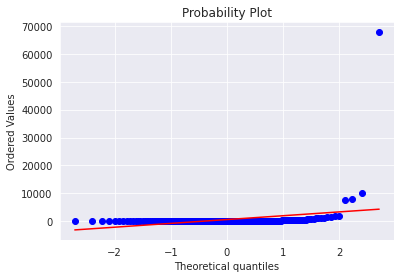

In [28]:
import pylab

stats.probplot(data.Confirmed, dist='norm', plot=pylab)

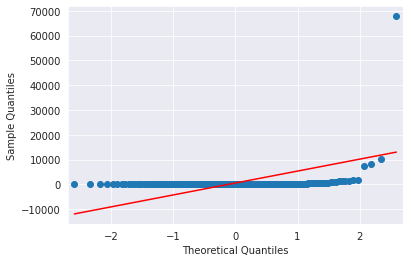

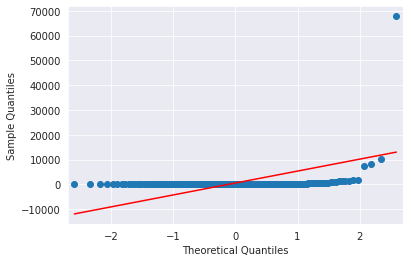

In [31]:
from statsmodels.graphics.gofplots import qqplot

qqplot(data.Confirmed, line='s')

In [32]:
stats.shapiro(data.Confirmed)

ShapiroResult(statistic=0.08852064609527588, pvalue=2.655296917603526e-30)

In [33]:
stats.normaltest(data.Confirmed)

NormaltestResult(statistic=443.12476977743074, pvalue=5.979692419102666e-97)

In [37]:
data[data.Confirmed < 1000]

,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Temprature,Humidity,Temp_Cat,Humid_Cat,location
11,2020-03-08T05:13:06,990,6,984,31.8257,117.2264,13.2,70,1,1,Mainland China-Anhui
12,2020-03-10T01:33:02,935,1,927,27.6140,115.7221,12.7,97,1,1,Mainland China-Jiangxi
13,2020-03-10T07:33:03,758,6,719,36.3427,118.1498,8.6,55,0,0,Mainland China-Shandong
14,2020-03-06T01:29:39,696,6,40,35.4437,139.6380,10.9,45,0,0,Others-Diamond Princess cruise ship
15,2020-03-10T08:13:08,631,0,627,32.9711,119.4550,11.3,79,0,0,Mainland China-Jiangsu
...,...,...,...,...,...,...,...,...,...,...,...
201,2020-03-10T02:33:04,0,0,0,34.8405,-106.2485,10.0,75,0,0,US-New Mexico
202,2020-03-10T02:33:04,0,0,0,47.5289,-99.7840,2.7,89,0,0,US-North Dakota
203,2020-03-10T02:33:04,0,0,0,44.2998,-99.4388,5.9,69,0,0,US-South Dakota
204,2020-03-10T02:33:04,0,0,0,38.4912,-80.9545,10.6,96,0,0,US-West Virginia


In [38]:
data[data.Confirmed < 2000]

,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Temprature,Humidity,Temp_Cat,Humid_Cat,location
4,2020-03-10T18:53:02,1784,33,12,47.0000,2.0000,11.9,93,0,0,France-
5,2020-03-10T23:53:02,1695,35,32,40.0000,-4.0000,22.3,36,1,1,Spain-
6,2020-03-10T18:53:02,1457,2,18,51.0000,9.0000,10.4,91,0,0,Germany-
7,2020-03-10T09:13:07,1353,8,1274,23.3417,113.4244,20.9,79,1,1,Mainland China-Guangdong
8,2020-03-08T05:03:02,1272,22,1247,33.8820,113.6140,14.7,59,1,1,Mainland China-Henan
...,...,...,...,...,...,...,...,...,...,...,...
201,2020-03-10T02:33:04,0,0,0,34.8405,-106.2485,10.0,75,0,0,US-New Mexico
202,2020-03-10T02:33:04,0,0,0,47.5289,-99.7840,2.7,89,0,0,US-North Dakota
203,2020-03-10T02:33:04,0,0,0,44.2998,-99.4388,5.9,69,0,0,US-South Dakota
204,2020-03-10T02:33:04,0,0,0,38.4912,-80.9545,10.6,96,0,0,US-West Virginia


In [39]:
data[data.Confirmed < 3000]

,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Temprature,Humidity,Temp_Cat,Humid_Cat,location
4,2020-03-10T18:53:02,1784,33,12,47.0000,2.0000,11.9,93,0,0,France-
5,2020-03-10T23:53:02,1695,35,32,40.0000,-4.0000,22.3,36,1,1,Spain-
6,2020-03-10T18:53:02,1457,2,18,51.0000,9.0000,10.4,91,0,0,Germany-
7,2020-03-10T09:13:07,1353,8,1274,23.3417,113.4244,20.9,79,1,1,Mainland China-Guangdong
8,2020-03-08T05:03:02,1272,22,1247,33.8820,113.6140,14.7,59,1,1,Mainland China-Henan
...,...,...,...,...,...,...,...,...,...,...,...
201,2020-03-10T02:33:04,0,0,0,34.8405,-106.2485,10.0,75,0,0,US-New Mexico
202,2020-03-10T02:33:04,0,0,0,47.5289,-99.7840,2.7,89,0,0,US-North Dakota
203,2020-03-10T02:33:04,0,0,0,44.2998,-99.4388,5.9,69,0,0,US-South Dakota
204,2020-03-10T02:33:04,0,0,0,38.4912,-80.9545,10.6,96,0,0,US-West Virginia


In [41]:
data.query('Confirmed > 3000')

,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Temprature,Humidity,Temp_Cat,Humid_Cat,location
0,2020-03-10T15:13:05,67760,3024,47743,30.9756,112.2707,12.5,86,1,1,Mainland China-Hubei
1,2020-03-10T17:53:02,10149,631,724,43.0000,12.0000,12.9,64,1,1,Italy-
2,2020-03-10T19:13:20,8042,291,2731,32.0000,53.0000,11.9,9,0,0,Iran (Islamic Republic of)-
3,2020-03-10T19:13:20,7513,54,247,36.0000,128.0000,4.9,41,0,0,Republic of Korea-


<AxesSubplot:>

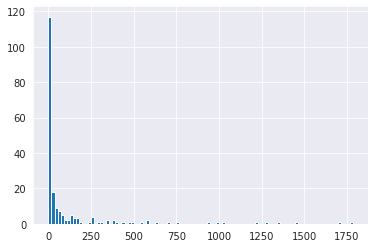

In [43]:
data.query('Confirmed < 3000')['Confirmed'].hist(bins=100)

((array([-2.70399742, -2.39482346, -2.21863595, -2.0924908 , -1.992851  ,
         -1.90978503, -1.83812472, -1.77482273, -1.71792502, -1.66610037,
         -1.61839937, -1.57412009, -1.53272827, -1.49380745, -1.45702643,
         -1.42211725, -1.38885992, -1.35707154, -1.32659826, -1.29730942,
         -1.26909306, -1.24185244, -1.21550343, -1.18997232, -1.16519417,
         -1.14111147, -1.11767302, -1.09483301, -1.0725503 , -1.05078779,
         -1.02951189, -1.00869209, -0.98830058, -0.96831196, -0.94870293,
         -0.92945206, -0.91053964, -0.89194741, -0.87365851, -0.85565727,
         -0.83792911, -0.82046048, -0.8032387 , -0.78625192, -0.76948905,
         -0.75293966, -0.73659396, -0.72044274, -0.70447732, -0.68868947,
         -0.67307145, -0.65761591, -0.64231589, -0.62716477, -0.61215628,
         -0.59728443, -0.58254353, -0.56792815, -0.55343308, -0.53905338,
         -0.52478429, -0.51062126, -0.49655992, -0.4825961 , -0.46872574,
         -0.45494499, -0.4412501 , -0.

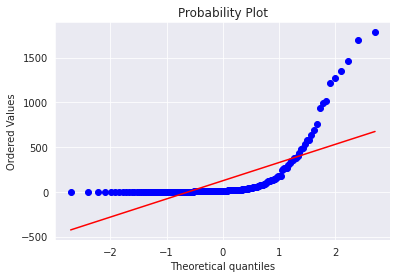

In [44]:
stats.probplot(data.query('Confirmed < 3000')['Confirmed'],
               dist='norm', plot=pylab)

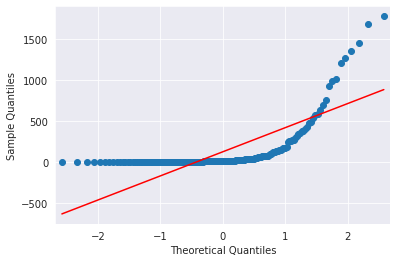

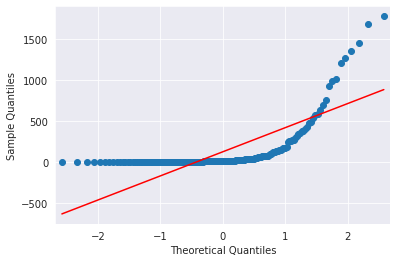

In [45]:
qqplot(data.query('Confirmed < 3000')['Confirmed'], line='s')

In [46]:
stats.shapiro(data.query('Confirmed < 3000')['Confirmed'])

ShapiroResult(statistic=0.47024112939834595, pvalue=3.4070448901475e-24)

### Deaths

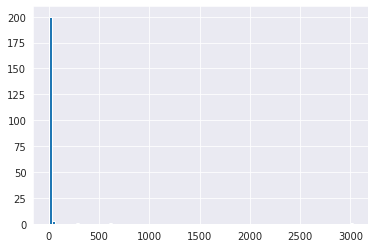

In [47]:
data.Deaths.hist(bins=100);

### Recovered

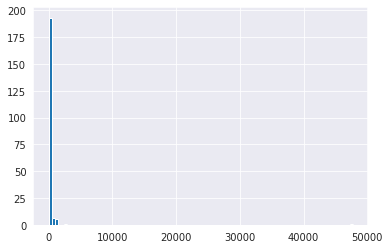

In [48]:
data.Recovered.hist(bins=100);

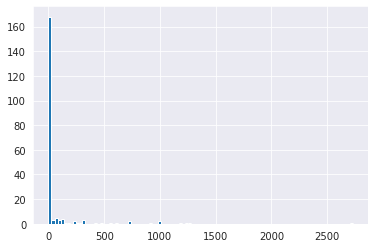

In [49]:
data.query('Recovered < 10000')['Recovered'].hist(bins=100);

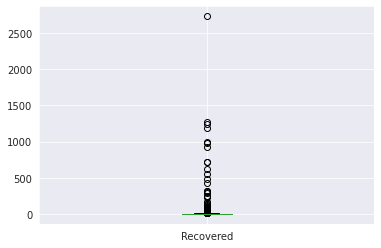

In [50]:
data.query('Recovered < 10000')['Recovered'].plot.box();

In [51]:
data.query('Recovered < 10000')['Recovered'].describe()

count     205.000000
mean       81.273171
std       283.430532
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max      2731.000000
Name: Recovered, dtype: float64

### Temperature

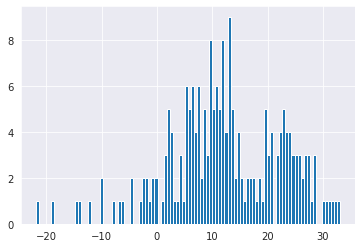

In [52]:
data.Temprature.hist(bins=100);

In [54]:
data.rename({'Temprature': 'Temperature'}, axis=1, inplace=True)

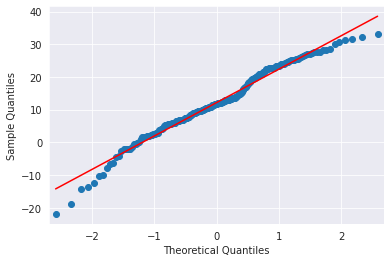

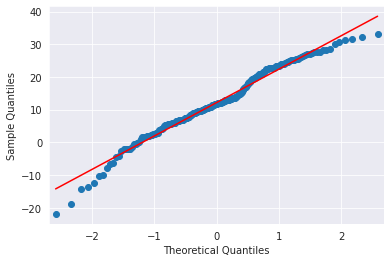

In [57]:
qqplot(data.Temperature, line='s')

((array([-2.71049554, -2.40199212, -2.22624724, -2.10045095, -2.00110795,
         -1.9183052 , -1.84688445, -1.7838044 , -1.72711495, -1.67548768,
         -1.62797516, -1.58387697, -1.54266003, -1.5039088 , -1.46729282,
         -1.43254474, -1.39944511, -1.36781141, -1.3374902 , -1.30835111,
         -1.28028247, -1.25318777, -1.2269831 , -1.20159492, -1.17695849,
         -1.15301643, -1.12971767, -1.10701655, -1.08487203, -1.06324711,
         -1.0421083 , -1.02142519, -1.00117005, -0.98131755, -0.96184447,
         -0.94272946, -0.92395285, -0.90549646, -0.88734349, -0.86947831,
         -0.85188643, -0.83455431, -0.81746934, -0.80061972, -0.7839944 ,
         -0.76758301, -0.75137579, -0.73536359, -0.71953774, -0.70389009,
         -0.68841292, -0.67309893, -0.65794119, -0.64293314, -0.62806852,
         -0.61334141, -0.59874614, -0.58427732, -0.56992979, -0.55569865,
         -0.54157916, -0.52756684, -0.51365734, -0.49984653, -0.4861304 ,
         -0.47250513, -0.45896703, -0.

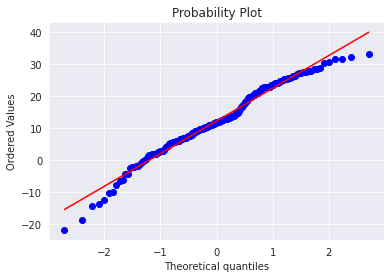

In [58]:
stats.probplot(data.Temperature, dist='norm', plot=pylab)

It's Ok and normal!

In [65]:
stats.shapiro(data.Temperature)

ShapiroResult(statistic=0.979755163192749, pvalue=0.004575613886117935)

In [66]:
stats.normaltest(data.Temperature)

NormaltestResult(statistic=5.4410333442912755, pvalue=0.06584072756681235)

In [67]:
stats.anderson(data.Temperature)

AndersonResult(statistic=0.9885133622821058, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.072]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### Humidity

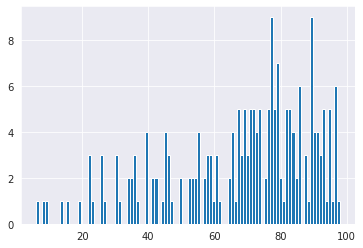

In [68]:
data.Humidity.hist(bins=100);

Does not look so normal!

((array([-2.71049554, -2.40199212, -2.22624724, -2.10045095, -2.00110795,
         -1.9183052 , -1.84688445, -1.7838044 , -1.72711495, -1.67548768,
         -1.62797516, -1.58387697, -1.54266003, -1.5039088 , -1.46729282,
         -1.43254474, -1.39944511, -1.36781141, -1.3374902 , -1.30835111,
         -1.28028247, -1.25318777, -1.2269831 , -1.20159492, -1.17695849,
         -1.15301643, -1.12971767, -1.10701655, -1.08487203, -1.06324711,
         -1.0421083 , -1.02142519, -1.00117005, -0.98131755, -0.96184447,
         -0.94272946, -0.92395285, -0.90549646, -0.88734349, -0.86947831,
         -0.85188643, -0.83455431, -0.81746934, -0.80061972, -0.7839944 ,
         -0.76758301, -0.75137579, -0.73536359, -0.71953774, -0.70389009,
         -0.68841292, -0.67309893, -0.65794119, -0.64293314, -0.62806852,
         -0.61334141, -0.59874614, -0.58427732, -0.56992979, -0.55569865,
         -0.54157916, -0.52756684, -0.51365734, -0.49984653, -0.4861304 ,
         -0.47250513, -0.45896703, -0.

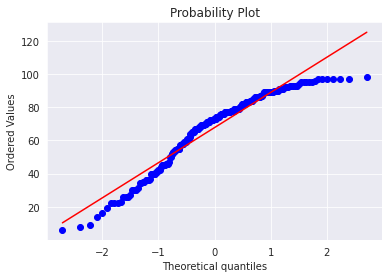

In [69]:
stats.probplot(data.Humidity, dist='norm', plot=pylab)

In [70]:
stats.shapiro(data.Humidity)

ShapiroResult(statistic=0.9280291199684143, pvalue=1.610098365745216e-08)

In [71]:
stats.normaltest(data.Humidity)

NormaltestResult(statistic=19.37789691992748, pvalue=6.196452835418724e-05)

In [72]:
stats.anderson(data.Humidity)

AndersonResult(statistic=4.591058907877027, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.072]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

seems that anderson test generates the same critical_values for all different columns of our data